In [7]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = np.load("bloodmnist.npz")
train_images = data["train_images"]
print(np.shape(data["train_images"]))
val_images = data["val_images"]
print(np.shape(data["val_images"]))
test_images = data["test_images"]
print(np.shape(data["test_images"]))
train_labels = data["train_labels"]
print(np.shape(data["train_labels"]))
val_labels = data["val_labels"]
print(np.shape(data["val_labels"]))
test_labels = data["test_labels"]
print(np.shape(data["test_labels"]))

# Combine images 
whole_images = np.append(train_images, val_images, axis=0)
whole_images = np.append(whole_images, test_images, axis=0)

# Combine labels
whole_labels = np.append(train_labels, val_labels, axis=0)
whole_labels = np.append(whole_labels, test_labels, axis=0)

print(np.shape(whole_images))
print(np.shape(whole_labels))

(11959, 28, 28, 3)
(1712, 28, 28, 3)
(3421, 28, 28, 3)
(11959, 1)
(1712, 1)
(3421, 1)
(17092, 28, 28, 3)
(17092, 1)


In [3]:
class ImageDataset:
    def __init__(self, images, labels):
        self.images = images/255
        self.labels = labels
        self.class_num = len(np.unique(labels))
        self.counts = []
        self.proportions = []
        self.length = np.shape(images)[0]
        self.width = np.shape(images)[1]
        # self.iamge_features = []
        self.one_hot_labels = self.one_hot_encode()
        self.update_counts()
        # self.oversample()

    def update_counts(self):
        self.counts = []
        self.proportions = []
        
        for i in range(self.class_num):
            self.counts.append(len(np.where(self.labels == i)[0]))
        
        self.proportions = [count/self.length for count in self.counts]

    def oversample(self):
        ros = RandomOverSampler(random_state=0)
        self.images= self.images.reshape((self.length, self.width*self.width*3))
        self.images, self.labels = ros.fit_resample(self.images, self.labels)
        self.length = self.images.shape[0]
        self.images = self.images.reshape((self.length, self.width, self.width, 3))
        self.one_hot_labels = self.one_hot_encode()
        self.update_counts()
        self.image_features = self.images

    def one_hot_encode(self):
        one_hot_labels = np.array([np.zeros(self.class_num) for i in range(self.length)])
        for i in range(self.length):
            one_hot_labels[i][self.labels[i]] = 1
        return one_hot_labels
    
    # def apply_CNN(self, model):

    def shuffle(self):
        p = np.random.permutation(self.length)
        self.images, self.labels, self.one_hot_labels = self.images[p], self.labels[p], self.one_hot_labels[p]

    def get_features(self, model):
        print(np.shape(self.images), np.shape(self.one_hot_labels))
        self.image_features = model.predict(self.images)


# Visualising Data
--- 

This dataset has 8 classes with the following distribution

[0 1 2 3 4 5 6 7]


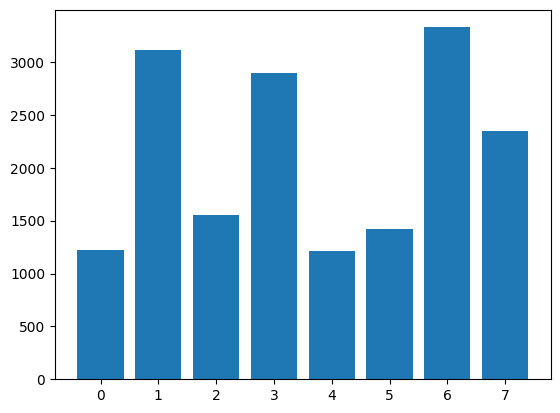

In [10]:
whole_dataset = ImageDataset(whole_images, whole_labels)
train_dataset = ImageDataset(train_images, train_labels)
val_dataset = ImageDataset(val_images, val_labels)
test_dataset = ImageDataset(test_images, test_labels)

labels = { 0: 'basophil', 
        1: 'eosinophil', 
        2: 'erythroblast', 
        3: 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)',
        4: 'lymphocyte', 
        5: 'monocyte', 
        6: 'neutrophil', 
        7: 'platelet'
    }

print(np.unique(whole_dataset.labels))
x = np.array(list(range(8)))
y = np.array(whole_dataset.counts)

plt.bar(x, y)
plt.show()

dataset_frame = pd.DataFrame({'labels': [i[0] for i in whole_dataset.labels], 'index': list(range(whole_dataset.length))})
sns.barplot(dataset_frame, x='index', y= 'labels')
plt.show()

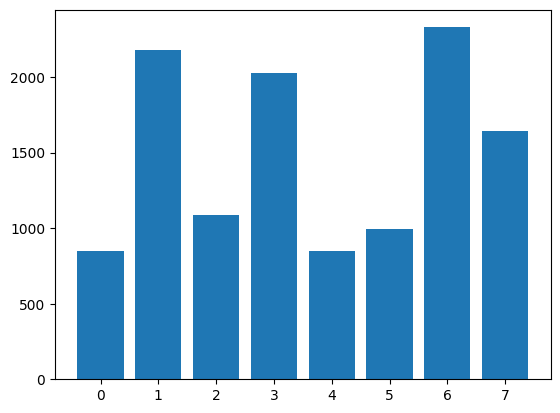

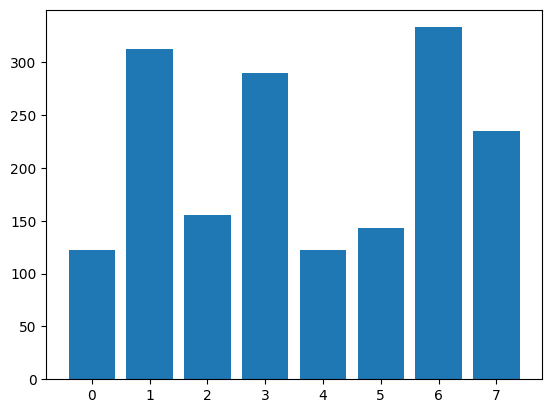

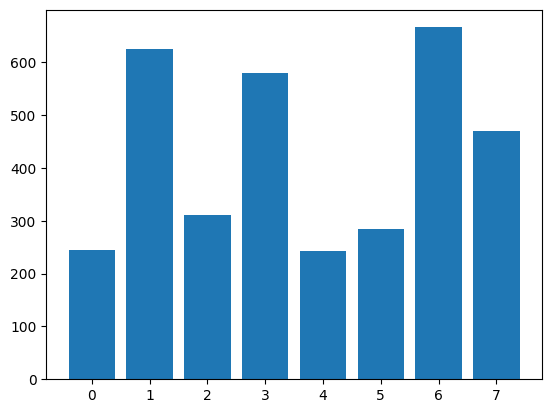

In [6]:
dataset_dict = {0: train_dataset, 1:val_dataset, 2:test_dataset}
for dataset in dataset_dict:
    x = np.array(list(range(8)))
    y = np.array(dataset_dict[dataset].counts)

    plt.bar(x, y)
    plt.show()